# Imports and installations

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from pandas import read_csv, DataFrame
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
import statsmodels.tsa as ts1
from statsmodels.tsa.api import VAR

## Fetch data from finam

In [ ]:
!wget https://www.dropbox.com/s/b0mhndveqqf73qb/NYMEX.PA_210111_211224.csv?dl=0 -O NYMEX.PA_210111_211224.csv

--2022-04-21 08:30:56--  https://www.dropbox.com/s/b0mhndveqqf73qb/NYMEX.PA_210111_211224.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/b0mhndveqqf73qb/NYMEX.PA_210111_211224.csv [following]
--2022-04-21 08:30:56--  https://www.dropbox.com/s/raw/b0mhndveqqf73qb/NYMEX.PA_210111_211224.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucceb2831ca5b27dbe05d1bc29f2.dl.dropboxusercontent.com/cd/0/inline/Bjye9plBJ1bVXO7tfvj2VVaVygSXJzDqoLCigPNOHFDzByHwK0b7A0qme5vSMLLjeAQKZ-CgPhNaWvmKmrTAM2IVtMJQychUOvBTRPc13P3-Qzx2532ILJQbSLsYvrmsQBJ54kqKCgXzVMNE-J6iEE9Za844U0w1tMWc8jXzCjCa2g/file# [following]
--2022-04-21 08:30:57--  https://ucceb2831ca5b27dbe05d1bc29f2.dl.dropboxusercontent.com/cd/0/inline/Bjye9plBJ1bVXO7tfvj2V

In [ ]:
!wget https://www.dropbox.com/s/mmb6nm5eg7qexsg/NYMEX.PL_210111_211224.csv?dl=0 -O NYMEX.PL_210111_211224.csv

--2022-04-21 08:31:21--  https://www.dropbox.com/s/mmb6nm5eg7qexsg/NYMEX.PL_210111_211224.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/mmb6nm5eg7qexsg/NYMEX.PL_210111_211224.csv [following]
--2022-04-21 08:31:22--  https://www.dropbox.com/s/raw/mmb6nm5eg7qexsg/NYMEX.PL_210111_211224.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uccbf472f2d2221bccbd8d9862de.dl.dropboxusercontent.com/cd/0/inline/BjywtAUYmbCb7r_omTJ2Ytoxmjl4AJIcy14mOn8o9VtdMxi61peCwZw3t7iUk3lRiWfKfn-BN8O5Fb1j2nKoDD2b4uSKwvScCunnStdPba2de5xbdDfjgS9QdAqqWT-Zq0tIx-ty8_KP6jKVDoLU_9g7YVPwR5wkIiy9NijnYJdLGQ/file# [following]
--2022-04-21 08:31:22--  https://uccbf472f2d2221bccbd8d9862de.dl.dropboxusercontent.com/cd/0/inline/BjywtAUYmbCb7r_omTJ2Y

In [ ]:
!wget https://www.dropbox.com/s/ffg7u6e3lq6rtut/comex.GC_210111_211224.csv?dl=0 -O comex.GC_210111_211224.csv

--2022-04-21 08:31:52--  https://www.dropbox.com/s/ffg7u6e3lq6rtut/comex.GC_210111_211224.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ffg7u6e3lq6rtut/comex.GC_210111_211224.csv [following]
--2022-04-21 08:31:52--  https://www.dropbox.com/s/raw/ffg7u6e3lq6rtut/comex.GC_210111_211224.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfd2fa0abccea06ad44687fa0cf.dl.dropboxusercontent.com/cd/0/inline/Bjy1SAzZ-bedQSX0BxYI7FKBtMyML-3mMv6j6iB4a8FhgCyBU3tNEBwt8P34-izIUZUSnpeCXaDtEfqSVnfQsrAB0xdb9lJQpXZgcEs5mKHiCZL8GQT01S5MnOQnfu57K09H1alQehvk42Ef_qzvyCYkr60FhXF_UjRdExHVDTe7Jw/file# [following]
--2022-04-21 08:31:52--  https://ucfd2fa0abccea06ad44687fa0cf.dl.dropboxusercontent.com/cd/0/inline/Bjy1SAzZ-bedQSX0BxYI7

In [ ]:
!wget https://www.dropbox.com/s/36yfzi52tp7ebcu/comex.SI_210111_211224.csv?dl=0 -O comex.SI_210111_211224.csv

--2022-04-21 08:32:18--  https://www.dropbox.com/s/36yfzi52tp7ebcu/comex.SI_210111_211224.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/36yfzi52tp7ebcu/comex.SI_210111_211224.csv [following]
--2022-04-21 08:32:18--  https://www.dropbox.com/s/raw/36yfzi52tp7ebcu/comex.SI_210111_211224.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6a9d9731fe654942fe4532bba6.dl.dropboxusercontent.com/cd/0/inline/BjwUcApiTt2flacX78sUaW0yCuUEceHK-ie4v_aubShB6G04QPnHSUYAAKuGYqZ7HRMzEnv92pziCKOjMnLw7fXw5-3Ji6nU7Lqd5-XM_NgfauUSTEByyP_Fqcl86fAEKqT-j9ZGWFwtjmO8xXqaKVHgzyvWPOdSUaAjpuzgY_lXXg/file# [following]
--2022-04-21 08:32:18--  https://uc6a9d9731fe654942fe4532bba6.dl.dropboxusercontent.com/cd/0/inline/BjwUcApiTt2flacX78sUa

# DATA

## Gold

In [ ]:
data_gold = pd.read_csv("/content/comex.GC_210111_211224.csv", index_col=0,
                 sep=';', parse_dates=True)
data_gold.head(5)

,TIME,OPEN,HIGH,LOW,CLOSE,VOL
DATE,,,,,,
2021-11-01,00:00:00,1844.4,1855.6,1817.1,1847.6,204927
2021-12-01,00:00:00,1847.5,1864.0,1835.8,1859.2,187847
2021-01-13,00:00:00,1859.1,1863.0,1841.6,1847.9,151844
2021-01-14,00:00:00,1847.8,1857.3,1826.6,1846.7,158061
2021-01-15,00:00:00,1846.7,1856.6,1822.1,1827.7,187936


## Silver

In [ ]:
data_silver = pd.read_csv("/content/comex.SI_210111_211224.csv", index_col=0,
                 sep=';', parse_dates=True)
data_silver.head(5)

,TIME,OPEN,HIGH,LOW,CLOSE,VOL
DATE,,,,,,
2021-11-01,00:00:00,25.120,25.395,24.365,25.14,97901
2021-12-01,00:00:00,25.135,25.765,25.040,25.76,62022
2021-01-13,00:00:00,25.755,25.785,25.170,25.38,55659
2021-01-14,00:00:00,25.380,25.985,25.095,25.64,68173
2021-01-15,00:00:00,25.635,25.865,24.610,24.83,99615


## Platinum

In [ ]:
data_platinum = pd.read_csv("/content/NYMEX.PL_210111_211224.csv", index_col=0,
                 sep=';', parse_dates=True)
data_platinum.head(5)

,TIME,OPEN,HIGH,LOW,CLOSE,VOL
DATE,,,,,,
2021-11-01,00:00:00,1055.0,1066.7,1011.0,1054.9,16983
2021-12-01,00:00:00,1054.7,1083.0,1046.8,1082.6,12375
2021-01-13,00:00:00,1082.4,1113.1,1067.0,1104.0,13081
2021-01-14,00:00:00,1104.0,1129.2,1101.0,1126.6,7645
2021-01-15,00:00:00,1126.6,1129.9,1076.5,1078.7,13052


## Palladium

In [ ]:
data_palladium = pd.read_csv("/content/NYMEX.PA_210111_211224.csv", index_col=0,
                 sep=';', parse_dates=True)
data_palladium.head(5)

,TIME,OPEN,HIGH,LOW,CLOSE,VOL
DATE,,,,,,
2021-11-01,00:00:00,2365.0,2405.0,2344.5,2380.0,1348
2021-12-01,00:00:00,2387.0,2408.0,2364.5,2391.5,966
2021-01-13,00:00:00,2392.0,2409.0,2378.5,2400.0,889
2021-01-14,00:00:00,2390.5,2428.0,2373.5,2417.0,832
2021-01-15,00:00:00,2418.0,2465.5,2376.5,2391.0,1497


## Fetch Data

In [ ]:
data = pd.DataFrame()

In [ ]:
data['GOLD'] = data_gold['CLOSE']
data['SILVER'] = data_silver['CLOSE']
data['PLATINUM'] = data_platinum['CLOSE']
data['PALLADIUM'] = data_palladium.CLOSE

In [ ]:
data

,GOLD,SILVER,PLATINUM,PALLADIUM
DATE,,,,
2021-11-01,1847.6,25.140,1054.9,2380.0
2021-12-01,1859.2,25.760,1082.6,2391.5
2021-01-13,1847.9,25.380,1104.0,2400.0
2021-01-14,1846.7,25.640,1126.6,2417.0
2021-01-15,1827.7,24.830,1078.7,2391.0
...,...,...,...,...
2021-12-19,1800.7,22.360,921.8,1751.0
2021-12-20,1792.2,22.260,926.6,1753.0
2021-12-21,1791.0,22.515,928.8,1788.0


## Data Analysis

In [ ]:
data.describe()

,GOLD,SILVER,PLATINUM,PALLADIUM
count,298.000000,298.000000,298.000000,295.000000
mean,1796.605705,25.199272,1093.516779,2401.440000
std,47.008922,1.758784,102.063508,355.854423
min,1681.400000,21.555000,910.200000,1608.000000
25%,1768.500000,23.808750,1012.200000,2075.000000
50%,1792.400000,25.315000,1084.300000,2397.000000
75%,1825.100000,26.361250,1188.475000,2684.000000
max,1911.200000,28.825000,1318.900000,2986.500000


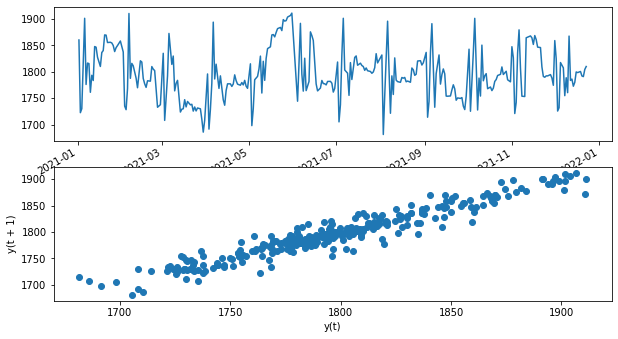

In [ ]:
fig, (ax1,ax2)=plt.subplots(nrows=2, ncols=1, figsize=(10,6))
data.GOLD.plot(ax=ax1)
pd.plotting.lag_plot(data.GOLD)

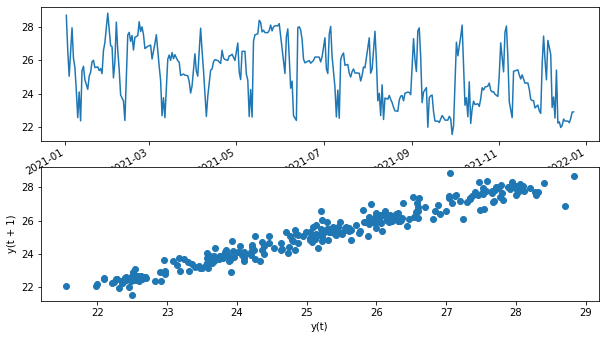

In [ ]:
fig, (ax1,ax2)=plt.subplots(nrows=2, ncols=1, figsize=(10,6))
data.SILVER.plot(ax=ax1)
pd.plotting.lag_plot(data.SILVER)

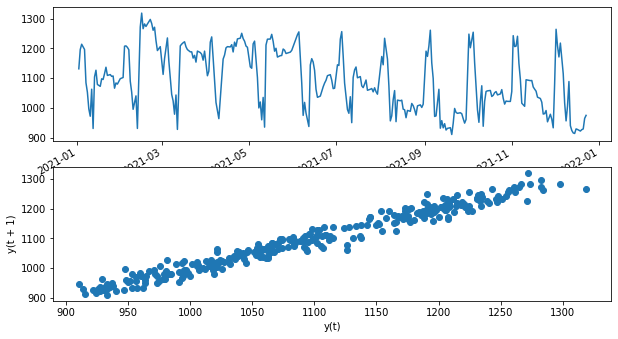

In [ ]:
fig, (ax1,ax2)=plt.subplots(nrows=2, ncols=1, figsize=(10,6))
data.PLATINUM.plot(ax=ax1)
pd.plotting.lag_plot(data.PLATINUM)

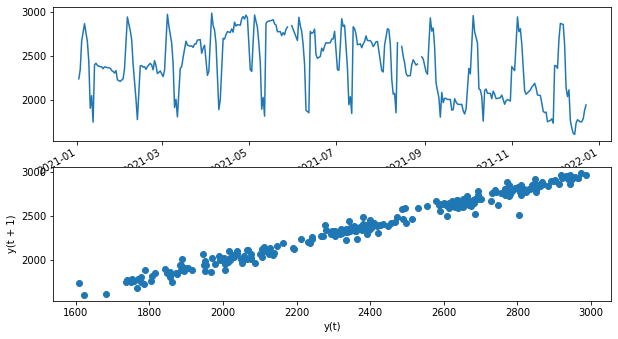

In [ ]:
fig, (ax1,ax2)=plt.subplots(nrows=2, ncols=1, figsize=(10,6))
data.PALLADIUM.plot(ax=ax1)
pd.plotting.lag_plot(data.PALLADIUM)

# Statmodels

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data.dropna(inplace=True)

## Visualisation

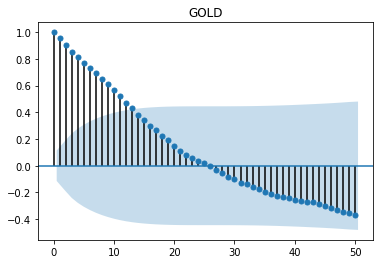

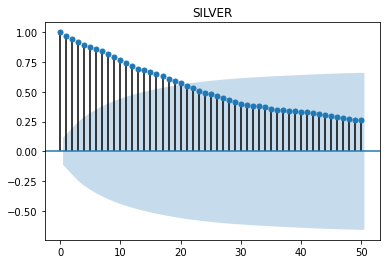

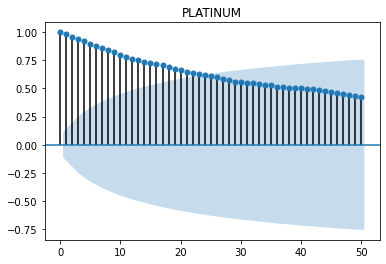

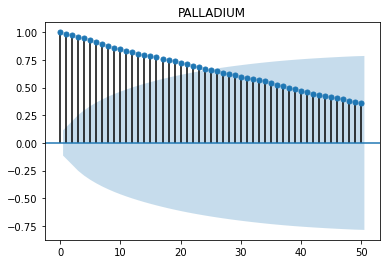

In [ ]:
for i in data:
    sm.graphics.tsa.plot_acf(data[i], lags = 50)
    plt.title(i)
    plt.show()

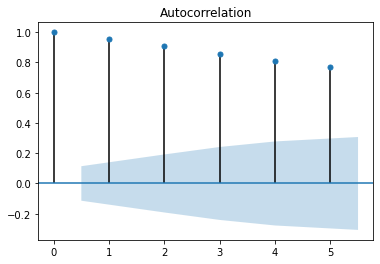

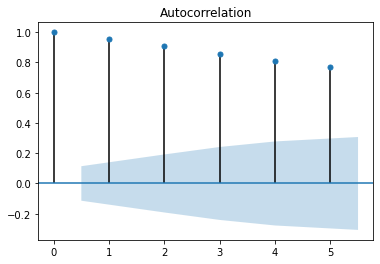

In [ ]:
sm.graphics.tsa.plot_acf(data['GOLD'], lags = 5)

## Time Series analitics

In [ ]:
def augmented_dickey_fuller_statistics(time_series):
      result = sm.tsa.adfuller(time_series.values)
      print('ADF Statistic: %f' % result[0])
      print('p-value: %f' % result[1])
      print('Critical Values:')   
      for key, value in result[4].items():
          print('\t%s: %.3f' % (key, value))

In [ ]:
print('Augmented Dickey-Fuller Test: Gold Price Time Series')
augmented_dickey_fuller_statistics(data['GOLD'])
print('Augmented Dickey-Fuller Test: Silver Price Time Series')
augmented_dickey_fuller_statistics(data['SILVER'])
print('Augmented Dickey-Fuller Test: Platinum Price Time Series')
augmented_dickey_fuller_statistics(data.PLATINUM)
print('Augmented Dickey-Fuller Test: Palladium Price Time Series')
augmented_dickey_fuller_statistics(data.PALLADIUM)

Augmented Dickey-Fuller Test: Gold Price Time Series
ADF Statistic: -2.621250
p-value: 0.088684
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572
Augmented Dickey-Fuller Test: Silver Price Time Series
ADF Statistic: -1.381810
p-value: 0.590965
Critical Values:
	1%: -3.453
	5%: -2.872
	10%: -2.572
Augmented Dickey-Fuller Test: Platinum Price Time Series
ADF Statistic: -1.400735
p-value: 0.581924
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572
Augmented Dickey-Fuller Test: Palladium Price Time Series
ADF Statistic: -0.917019
p-value: 0.782316
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572





*   GOLD: stationary
*   SILVER: non-stationary
* PLATINUM: non-stationary
* PALLADIUM: non-stationary





## Train-test split

In [ ]:
test_size = 10
X_train, X_test = data[0:-test_size], data[-test_size:]

In [ ]:
X_train.shape, X_test.shape

((285, 4), (10, 4))

In [ ]:
data.shape

(295, 4)

In [ ]:
X_train_diff=X_train.diff()

In [ ]:
X_train_diff.describe()

,GOLD,SILVER,PLATINUM,PALLADIUM
count,284.000000,284.000000,284.000000,284.000000
mean,-0.224648,-0.010229,-0.404577,-2.160211
std,13.708261,0.395772,19.128746,47.147132
min,-42.500000,-1.815000,-63.600000,-291.000000
25%,-6.600000,-0.220000,-12.850000,-24.625000
50%,0.000000,-0.005000,0.900000,0.500000
75%,7.150000,0.195000,11.000000,24.625000
max,32.700000,1.765000,57.400000,124.500000


## Visualisation of Train

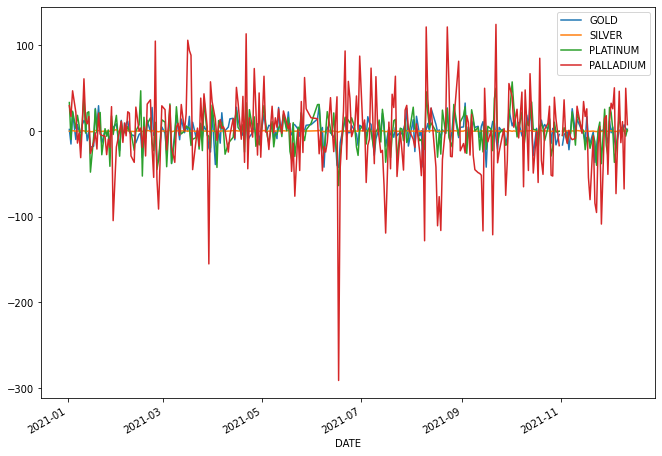

In [ ]:
X_train_diff.plot(figsize=(11,8), fontsize=10)
plt.show()

GOLD


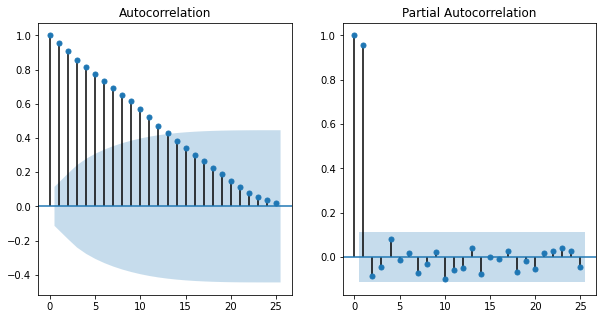

SILVER


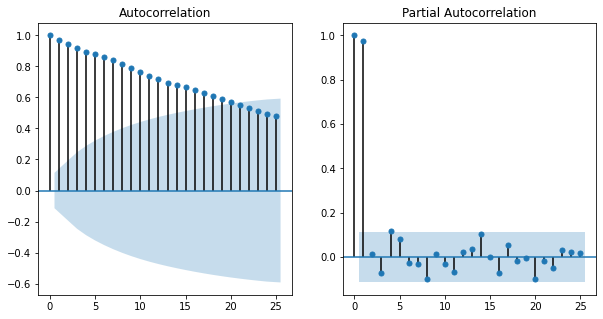

PLATINUM


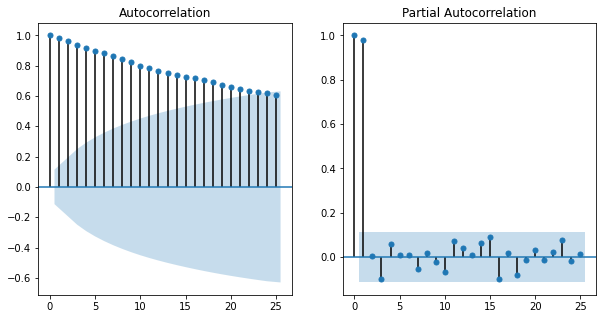

PALLADIUM


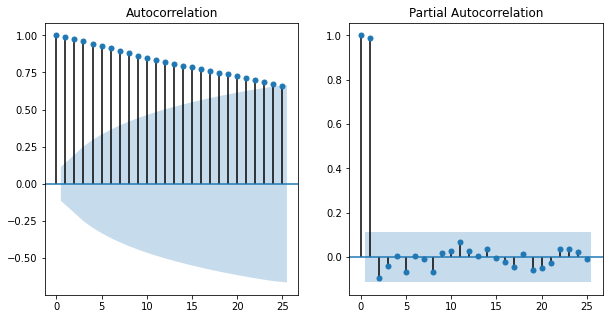

In [ ]:
for i in data:
    print(i)
    fig, ax=plt.subplots(1,2, figsize=(10,5))
    ax[0]=sm.graphics.tsa.plot_acf(data[i], ax=ax[0])
    ax[1]=sm.graphics.tsa.plot_pacf(data[i], ax=ax[1], method="ywm")
    plt.show()

In [ ]:
X_train_diff.dropna(inplace=True)
X_train_diff.index = pd.DatetimeIndex(X_train_diff.index).to_period('D')

## Training

In [ ]:
model =VAR(endog=X_train_diff)
res=model.select_order(30)
res.summary()

,AIC,BIC,FPE,HQIC
0,14.85,14.91*,2.827e+06,14.88*
1,14.84*,15.12,2.780e+06*,14.95
2,14.93,15.43,3.051e+06,15.13
3,15.02,15.74,3.333e+06,15.31
4,15.05,16.00,3.441e+06,15.43
5,15.13,16.30,3.715e+06,15.60
6,15.19,16.59,3.980e+06,15.75
7,15.24,16.86,4.177e+06,15.89
8,15.28,17.12,4.360e+06,16.02
9,15.32,17.38,4.518e+06,16.14


In [ ]:
model_fit=model.fit(maxlags=1)

## Evaluation

In [ ]:
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 21, Apr, 2022
Time:                     08:45:43
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    15.6450
Nobs:                     283.000    HQIC:                   15.4907
Log likelihood:          -3763.55    FPE:                4.81558e+06
AIC:                      15.3874    Det(Omega_mle):     4.48978e+06
--------------------------------------------------------------------
Results for equation GOLD
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const               -0.312304         0.811575           -0.385           0.700
L1.GOLD              0.217594         0.089865            2.421           0.015
L1.SILVER           -5.126445         3.272259           -1.567  

In [ ]:
lag_order = model_fit.k_ar 
print(lag_order)

1


In [ ]:
input_data = X_train_diff.values[-lag_order:] 
print(input_data)

[[0.7  0.02 2.1  7.5 ]]


In [ ]:
pred = model_fit.forecast(y=input_data, steps=test_size) 
pred= (pd.DataFrame(pred, index=X_test.index, columns=X_test.columns + '_pred')) 
print(pred)

            GOLD_pred  SILVER_pred  PLATINUM_pred  PALLADIUM_pred
DATE                                                             
2021-12-13  -0.445341    -0.015449      -0.730380       -1.581005
2021-12-14  -0.275712    -0.012393      -0.538125       -2.252950
2021-12-15  -0.258922    -0.012175      -0.499991       -2.205440
2021-12-16  -0.258905    -0.012178      -0.499036       -2.190536
2021-12-17  -0.259074    -0.012178      -0.499397       -2.189652
2021-12-19  -0.259100    -0.012178      -0.499451       -2.189808
2021-12-20  -0.259100    -0.012178      -0.499452       -2.189839
2021-12-21  -0.259100    -0.012178      -0.499451       -2.189839
2021-12-22  -0.259100    -0.012178      -0.499451       -2.189838
2021-12-23  -0.259100    -0.012178      -0.499451       -2.189838


In [ ]:
def invert_transformation(X_train, pred_df):
        forecast = pred_df.copy()
        columns = X_train.columns
        for col in columns:
              forecast[str(col)+'_pred'] = X_train[col].iloc[-1] + forecast[str(col) +'_pred'].cumsum()
        return forecast


In [ ]:
output=invert_transformation(X_train,pred)

In [ ]:
output

,GOLD_pred,SILVER_pred,PLATINUM_pred,PALLADIUM_pred
DATE,,,,
2021-12-13,1783.354659,22.219551,939.269620,1764.918995
2021-12-14,1783.078947,22.207158,938.731495,1762.666045
2021-12-15,1782.820025,22.194983,938.231504,1760.460605
2021-12-16,1782.561119,22.182804,937.732468,1758.270068
2021-12-17,1782.302045,22.170626,937.233071,1756.080417
2021-12-19,1782.042945,22.158448,936.733620,1753.890609
2021-12-20,1781.783845,22.146270,936.234168,1751.700770
2021-12-21,1781.524745,22.134092,935.734717,1749.510931
2021-12-22,1781.265646,22.121914,935.235266,1747.321093


### Graphs

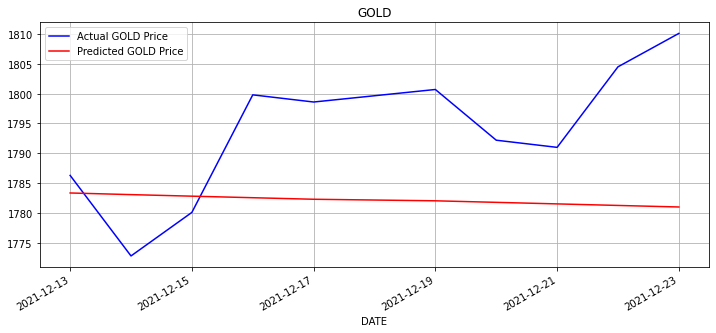

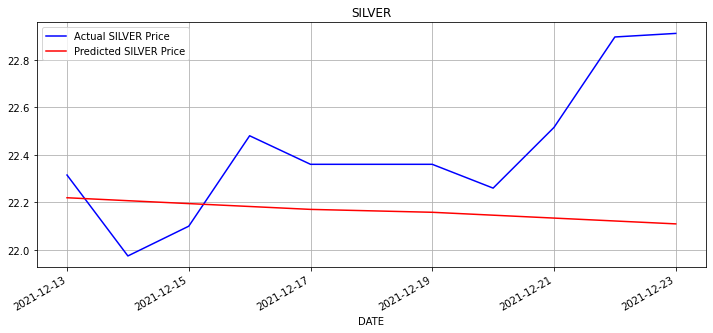

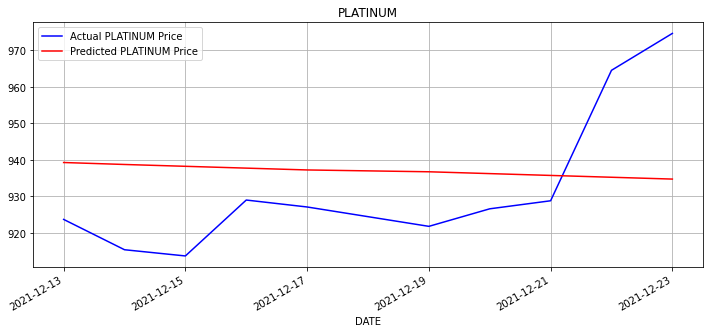

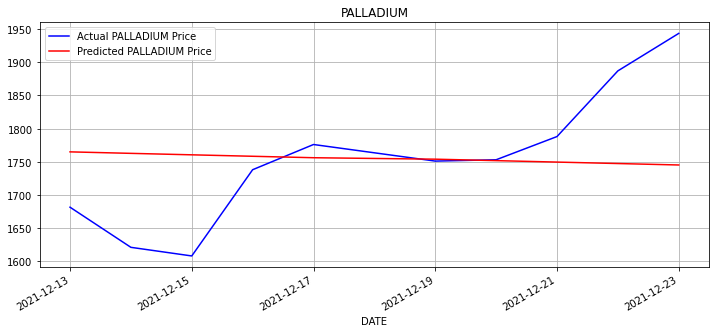

In [ ]:
for i in X_test:
    plt.figure(figsize=(12,5))
    plt.xlabel('DATE')
    plt.title(i)
    ax1=X_test[i].plot(color='blue', grid=True, label=f'Actual {i} Price')
    ax2=output[i+"_pred"].plot(color='red', grid=True, label=f'Predicted {i} Price')
    ax1.legend(loc=1)
    ax2.legend(loc=2)
    plt.show()
